## Custom Model Approach


In this approach we create index based on few feature in which we are interested and we can query on it like "Probable sales for a role-playing (genre) game developed by EA (publishar)"

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df_main = pd.read_csv("../../data/custom_model_data.csv")

print("data loaded")

data loaded


In [2]:
categorical = ["Genre", "Publisher"]
# drop our columns
df_filtered = df_main[categorical]
df_filtered.head()

Genre  Publisher
0  Puzzle    Unknown
1  Puzzle    Unknown
2  Puzzle    Unknown
3  Puzzle    Unknown
4    Misc  EA Sports

In [3]:
# filter for our top 10 publishers
top_publishers = list(
    df_main.groupby("Publisher").count()\
    .sort_values("Genre", ascending=False)\
    .head(10).index
)
top_publishers

['Sega',
 'Activision',
 'Electronic Arts',
 'Ubisoft',
 'EA Sports',
 'THQ',
 'Konami',
 'Atari',
 'Capcom',
 'Sony Computer Entertainment']

In [4]:
df_main = df_main.loc[df_main.Publisher.isin(top_publishers)]
df_main.head()

Genre  Publisher  TotalSales
4  Misc  EA Sports         0.0
5  Misc  EA Sports         0.0
6  Misc  EA Sports         0.0
7  Misc  EA Sports         0.0
8  Misc  EA Sports         0.0

In [5]:
for column in categorical:
    df_main[column] = df_main[column].astype("category")

In [6]:
levels = zip(df_main.Genre, df_main.Publisher)
df_main["multi"] = levels

df_main

Genre                    Publisher  TotalSales  \
4          Misc                    EA Sports        0.00   
5          Misc                    EA Sports        0.00   
6          Misc                    EA Sports        0.00   
7          Misc                    EA Sports        0.00   
8          Misc                    EA Sports        0.00   
25      Shooter                      Ubisoft        0.00   
26      Shooter                      Ubisoft        0.00   
27      Shooter                      Ubisoft        0.00   
28      Shooter                      Ubisoft        0.00   
29      Shooter                      Ubisoft        0.00   
30      Shooter                      Ubisoft        0.00   
31      Shooter                      Ubisoft        0.00   
32      Shooter                      Ubisoft        0.00   
33      Shooter                      Ubisoft        0.00   
34      Shooter                      Ubisoft        0.00   
43         Misc                         Sega        0.00   
44         Misc                         Sega        0.00   
45         Misc                         Sega        0.00   
46         Misc                         Sega        0.00   
47         Misc                         Sega        0.00   
48         Misc                         Sega        0.00   
49         Misc                         Sega        0.00   
50         Misc                         Sega        0.00   
151      Action  Sony Computer Entertainment        0.26   
172        Misc  Sony Computer Entertainment        0.00   
173        Misc  Sony Computer Entertainment        0.00   
180      Racing                         Sega        0.01   
184        Misc                       Capcom        0.00   
185        Misc                       Capcom        0.00   
186        Misc                       Capcom        0.00   
...         ...                          ...         ...   
83494  Fighting                   Activision        0.77   
83495  Fighting                   Activision        0.77   
83496  Fighting                   Activision        0.77   
83497  Fighting                   Activision        0.77   
83498    Sports                   Activision        0.00   
83499    Sports                   Activision        0.00   
83500    Sports                   Activision        0.00   
83501    Sports                   Activision        0.00   
83502    Sports                   Activision        0.00   
83503    Sports                   Activision        0.00   
83504    Sports                   Activision        0.49   
83505    Sports                   Activision        0.49   
83506    Sports                   Activision        0.49   
83507    Sports                   Activision        0.49   
83518   Shooter                        Atari        4.31   
83519   Shooter                        Atari        4.31   
83520   Shooter                        Atari        4.31   
83521   Shooter                        Atari        4.31   
83522   Shooter                        Atari        4.31   
83523   Shooter                        Atari        4.31   
83524      Misc                   Activision        0.27   
83525      Misc                   Activision        0.27   
83529    Action                   Activision        1.15   
83530    Action                   Activision        1.15   
83531    Action                   Activision        0.34   
83532      Misc                        Atari        0.24   
83533      Misc                        Atari        0.24   
83538    Action                   Activision        0.00   
83541   Shooter                       Konami        0.00   
83542      Misc                        Atari        0.00   

                                    multi  
4      <zip object at 0x000002C67B1F1348>  
5      <zip object at 0x000002C67B1F1348>  
6      <zip object at 0x000002C67B1F1348>  
7      <zip object at 0x000002C67B1F1348>  
8      <zip object at 0x000002C67B1F1348>  
25     <zip object at 0x0

[Text(0,0,'<zip object at 0x000002C67B1F1348>')]

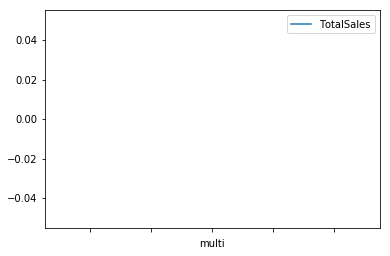

In [7]:
df_main[['multi', "TotalSales"]].groupby("multi").median()\
    .sort_values("TotalSales", ascending=False)\
    .plot.line()\
    .set_xticklabels(df_main["multi"].unique(), rotation="vertical")

In [11]:
def query(genre, publisher):
    return "Total Sale will be {}".format(df_main.loc[df_main["multi"] == (genre, publisher)].median()["TotalSales"])

In [15]:
query("RolePlaying", "EA Sports")

'Total Sale will be nan'